# <center> TP 1: Linear Regression <br> <small>Réda DEHAK<br> 15 November 2018</small> </center>

The goal of this lab is :
    - Implement a linear regression
    - Try different version of the gradient descent algorithm
    
We will use a data file that contain different measurements of height (variable y) of an individual sample according to the age (variable x).

## Import Data

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Height')

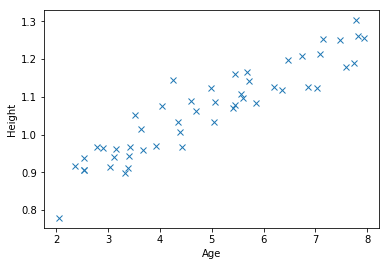

In [19]:
%pylab
%matplotlib inline
import pickle
fin = open('data.pkl', 'rb')
x = pickle.load(fin)
y = pickle.load(fin)
fin.close()

import matplotlib.pyplot as plt
plt.plot(x, y, 'x')
plt.xlabel('Age')
plt.ylabel('Height')

## Linear Regression

We will implement a linear regression for this problem, you know that the linear 
regression assumes that the observed variable $y$ is a linear combination of the 
vector of observation $x$

$$g(x) = W^T x =\sum_{d=0}^D w_d x_d$$
with $x_0 = 1$ corresponding to a bias

The linear regression consists in finding the parameters $W$ which minimizes the 
quadratic error:
$$E(W) = \sum_{i=1}^{N}\left(g(x_i) - y_i\right)^2$$

we will solve this problem using two different methods:

**1. Exact solution:**

The vector $W$ which minimize $E(W)$ is defined as follow:
$$W = pinv(X) Y^T$$

**a-** Compute the vector $W$ which minimize $E(W)$?

In [29]:
print(x.shape, y.shape)
X = x.reshape(-1, 1)
X = np.r_[np.ones(X.shape).T, X.T].T
Y = y.reshape(1, -1)
W = np.zeros((X.shape[1], Y.shape[0]))
print(X.shape, Y.shape, W.shape)

(50,) (50,)
(50, 2) (1, 50) (2, 1)


In [30]:
W = np.linalg.pinv(X) @ Y.T
print(W)

[[0.75016254]
 [0.06388117]]


**b-** Plot in the same figure the training data and straight 
line corresponding to the obtained $W$?

In [31]:
def plot_data():
    plt.plot(x, y, 'x')
    plt.xlabel('Age')
    plt.ylabel('Height')

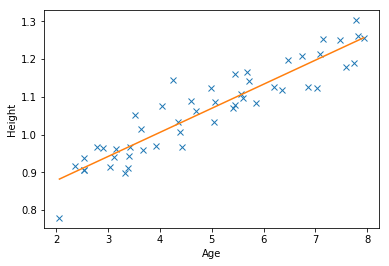

In [50]:
plot_data()

Xtest = np.linspace(min(x), max(x))
yhat = W[1, 0] * Xtest + W[0, 0]
plt.plot(Xtest, yhat)
plt.show()

**c-** Predict the height of a person of age 3.5 and that of age 7? 

In [52]:
def predict_age(W, age):
    return W[1, 0] * age + W[0, 0]

print(predict_age(W, 3.5), predict(W, 7))

0.9737466173916588 1.1973306977820788


**2. Gradient Descent :**
In this part, we will use the gradient descent algorithm (see convex optimization course) to find the best regression parameters. We will use the batch learning. 

**a-** Give the recurrence formula for $W$ of the algorithm?

$W_{n+1} = W_n - \eta\nabla L_B(W)$ with $B$ the batch samples

**b-** Implement a gradient descent with a learning rate $\eta = 0.07$ 
and starting from the origin of the space $W = 0$? Wait until the convergence of the algorithm?

In [97]:
def predict(W, X):
    return W.dot(X)

def loss(x, yhat):
    return np.sum((yhat - y) ** 2)

def loss_derivative(x, y, yhat):
    return x.T @ (yhat -y).T / 50

def sgd(x, y, eta, batch_size=None, max_iter=None):
    X = x.reshape(-1, 1)
    X = np.r_[np.ones(X.shape).T, X.T].T
    Y = y.reshape(1, -1)
    W = np.zeros((X.shape[1], Y.shape[0]))
    W_list = [W]
    if max_iter is None:
        max_iter = 10
    for i in range(max_iter):
        yhat = predict(W.T, X.T)
        l = loss(X, yhat)
        print(l)
        derivative = loss_derivative(X, y, yhat)
        W = W - eta * derivative
        W_list.append(W)
    return W, W_list

W2, W_list = sgd(x, y, 0.07, max_iter=1000)

57.373249073672106
53.51307762438588
49.921148042559125
46.578698263966295
43.46828031781665
40.57366826170999
37.87977256702385
35.372560502785156
33.03898209774418
30.866901289815736
28.845031899436744
26.962878088853714
25.21067899303557
23.579357229928135
22.060471018246048
20.646169650041326
19.32915208299766
18.102628433868457
16.96028416979135
15.896246808453697
14.905054951328086
13.981629486512293
13.121246809162026
12.319513918154733
11.572345257527846
10.875941180445015
10.226767922009042
9.621538975205338
9.05719777166689
8.530901575839339
8.040006507530524
7.582053613785313
7.154755916565774
6.755986367867982
6.3837666486969225
6.036256752775582
5.711745300006851
5.408640528559073
5.125461918028391
4.860832399462532
4.613471111128438
4.382186661787125
4.165870865918228
3.9634929178278684
3.7740939738904427
3.596782114329231
3.4307276579442902
3.275158805059214
3.129357585690895
2.992656091557688
2.864432972039572
2.744110175597313
2.6311499194533043
2.5250518715416814
2.42

**c-** Did you obtain the same result as question 1?

In [90]:
print(W2)

[[0.7496901 ]
 [0.06396712]]


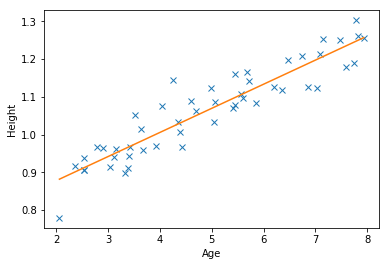

In [91]:
plot_data()

Xtest = np.linspace(min(x), max(x))
yhat = W2[1, 0] * Xtest + W2[0, 0]
plt.plot(Xtest, yhat)
plt.show()

**d-** To understand the gradient descent, we will display in 3D the curve of the error:

In [115]:
import numpy as np
error = np.zeros((100,100))
w0 = np.linspace(-1, 1.2, 100)
w1 = np.linspace(-0.25, 0.75, 100)
for i in range(w0.shape[0]):
    for j in range(w1.shape[0]):
        W = np.array([[w0[i]],[w1[j]]])
        error[i, j] = loss(X, predict(W.T, X.T))

In [127]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import interactive
W0, W1 = np.meshgrid(w0, w1)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(W0, W1, error, cmap=cm.jet, rstride=1, cstride=1)

W_list = np.array(W_list).reshape(-1, 2)
W0, W1 = W_list[:, 0], W_list[:, 1]
Z = []
for W in W_list:
    Z.append(loss(X, predict(W.T, X.T)))
ax.plot3D(W0, W1, Z)

interactive(True)

You can see different views of the plot using the mouse in the interactive mode

**e-** What is the link between this figure and different values of $W$ founded during the iterations of the gradient descent algorithm? Plot the path obtained using the different values of $W$ in the same figure?

cf previous plot, which I got worng for some reason

**f-** Conclude?

The chosen path is suboptimal. As we can see we bounce on different values of the gradient, because the learning rate seems too high. We could customize this lr, use a learning rate scheduler, an adam optimiser...

**g-** How can we improve the speed of convergence? implement this new method and compare the result with the previous decent algorithm?

Maybe a good method could be a Newton gradient descent.

Implemented in the next practicals